# RNN (Recurrent Neural Network) - LSTM (Long Short Term Memory) - GRU (Gated Recurrent Unit)

# RNN

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.models import Sequential

In [2]:
# Generate example data
X = np.random.rand(100, 10, 1)
y = np.random.randint(0, 2, size=(100,))

In [3]:
X.shape, y.shape

((100, 10, 1), (100,))

In [4]:
# Define the model
model = Sequential([
    SimpleRNN(32, input_shape=(10, 1)),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/10
4/4 [==============================] - 2s 8ms/step - loss: 0.6960 - accuracy: 0.4500
Epoch 2/10
4/4 [==============================] - 0s 7ms/step - loss: 0.6909 - accuracy: 0.4800
Epoch 3/10
4/4 [==============================] - 0s 7ms/step - loss: 0.6917 - accuracy: 0.5400
Epoch 4/10
4/4 [==============================] - 0s 11ms/step - loss: 0.6915 - accuracy: 0.5200
Epoch 5/10
4/4 [==============================] - 0s 8ms/step - loss: 0.6895 - accuracy: 0.5700
Epoch 6/10
4/4 [==============================] - 0s 7ms/step - loss: 0.6863 - accuracy: 0.5500
Epoch 7/10
4/4 [==============================] - 0s 7ms/step - loss: 0.6837 - accuracy: 0.5400
Epoch 8/10
4/4 [==============================] - 0s 6ms/step - loss: 0.6822 - accuracy: 0.5400
Epoch 9/10
4/4 [==============================] - 0s 6ms/step - loss: 0.6834 - accuracy: 0.5700
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: 0.6849 - accuracy: 0.5500
Test Loss: 0.6848709583282471
Test Acc

# LSTM (Long Short Term Memory) is a special kind of RNN, capable of learning long-term dependencies.

In [5]:
import seaborn as sns 
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential

In [6]:
# Load flight data
flights = sns.load_dataset('flights')

# Convert data to time series 
df = pd.DataFrame({'value': flights['passengers'].values}, index=pd.date_range(start='1949-01-01', end='1960-12-01', freq='MS'))
df.head()

,value
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Epoch 1/100
4/4 [==============================] - 4s 22ms/step - loss: 0.9885
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 0.8095
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6747
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 0.5411
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 0.4432
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 0.3483
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2739
Epoch 8/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2177
Epoch 9/100
4/4 [==============================] - 0s 10ms/step - loss: 0.1913
Epoch 10/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1801
Epoch 11/100
4/4 [==============================] - 0s 11ms/step - loss: 0.1877
Epoch 12/100
4/4 [==============================] - 0s 10ms/step - loss: 0.1853
Epoch 13/100
4/4 [==============================] - 

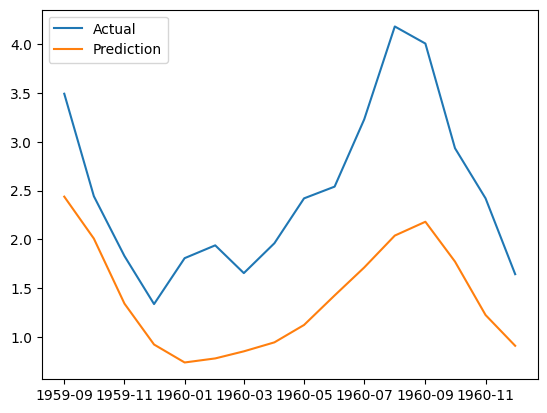

In [7]:
# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Normalize the data
train_mean = train_data.mean()
train_std = train_data.std()
train_data = (train_data - train_mean) / train_std
test_data = (test_data - train_mean) / train_std

# Convert data to sequences
def to_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length-1):
        X_seq = data[i:(i+seq_length)].values
        X.append(X_seq)
        y_seq = data.iloc[i+seq_length].values[0]
        y.append(y_seq)
    return np.array(X), np.array(y)

seq_length = 12
X_train, y_train = to_sequences(train_data, seq_length)
X_test, y_test = to_sequences(test_data, seq_length)

# Reshape input to be (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the model
model = Sequential([
    LSTM(32, input_shape=(seq_length, 1)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Make predictions on test data
y_pred = model.predict(X_test)

# Plot the predictions and actual values
import matplotlib.pyplot as plt
plt.plot(test_data.index[seq_length+1:], y_test, label='Actual')
plt.plot(test_data.index[seq_length+1:], y_pred, label='Prediction')
plt.legend()
plt.show()

# let's build a simple RNN-based character-level text generator using a sample test. We'll use a sequence-to-sequence prediction approach to predict the next character in a sequence.

In [13]:
import numpy as np 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Sample text data 
text = "hello world! this is a sample text example for rnn."
chars = sorted(list(set(text))) # Get unique characters
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))

# Create input-output sequences
seq_length = 10
X = []
y = []

for i in range(len(text) - seq_length):
        seq_in = text[i:i + seq_length]
        seq_out = text[i + seq_length]
        X.append([char_to_int[char] for char in seq_in])
        y.append(char_to_int[seq_out])

X = np.reshape(X, (len(X), seq_length, 1)) / float(len(chars)) # Normalize
y = tf.keras.utils.to_categorical(y)

# Define the model
model = Sequential([
    LSTM(128, input_shape=(X.shape[1], X.shape[2])),
    Dense(len(chars), activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(X, y, epochs=100, batch_size=10, verbose=1)

# Predict a sequence
start = np.random.randint(0, len(X)-1)
pattern = X[start]
print("Seed:")
print("\"", ''.join([int_to_char[int(value*len(chars))] for value in pattern]), "\"")

for i in range(50): # Generate 50 characters
    x = np.reshape(pattern, (1, len(pattern), 1))
    prediction = model.predict(x, verbose=1)
    index = np.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[int(value*len(chars))] for value in pattern]
    print(result, end="")
    pattern = np.append(pattern, index/float(len(chars)))
    pattern = pattern[1:len(pattern)]

print("\n")


Epoch 1/100
5/5 [==============================] - 3s 11ms/step - loss: 2.9332
Epoch 2/100
5/5 [==============================] - 0s 11ms/step - loss: 2.8996
Epoch 3/100
5/5 [==============================] - 0s 12ms/step - loss: 2.8729
Epoch 4/100
5/5 [==============================] - 0s 12ms/step - loss: 2.8444
Epoch 5/100
5/5 [==============================] - 0s 11ms/step - loss: 2.7965
Epoch 6/100
5/5 [==============================] - 0s 14ms/step - loss: 2.7657
Epoch 7/100
5/5 [==============================] - 0s 11ms/step - loss: 2.7448
Epoch 8/100
5/5 [==============================] - 0s 12ms/step - loss: 2.7431
Epoch 9/100
5/5 [==============================] - 0s 12ms/step - loss: 2.7540
Epoch 10/100
5/5 [==============================] - 0s 11ms/step - loss: 2.7254
Epoch 11/100
5/5 [==============================] - 0s 12ms/step - loss: 2.7384
Epoch 12/100
5/5 [==============================] - 0s 12ms/step - loss: 2.7323
Epoch 13/100
5/5 [==============================]

# GRU (Gated Recurrent Unit) is a variation of LSTM. It has fewer parameters than LSTM, as it lacks an output gate.

Epoch 1/100
4/4 [==============================] - 3s 9ms/step - loss: 0.2234
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 0.1740
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 0.1458
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 0.1392
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 0.1431
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 0.1398
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 0.1354
Epoch 8/100
4/4 [==============================] - 0s 12ms/step - loss: 0.1320
Epoch 9/100
4/4 [==============================] - 0s 13ms/step - loss: 0.1286
Epoch 10/100
4/4 [==============================] - 0s 13ms/step - loss: 0.1284
Epoch 11/100
4/4 [==============================] - 0s 12ms/step - loss: 0.1287
Epoch 12/100
4/4 [==============================] - 0s 10ms/step - loss: 0.1273
Epoch 13/100
4/4 [==============================] 

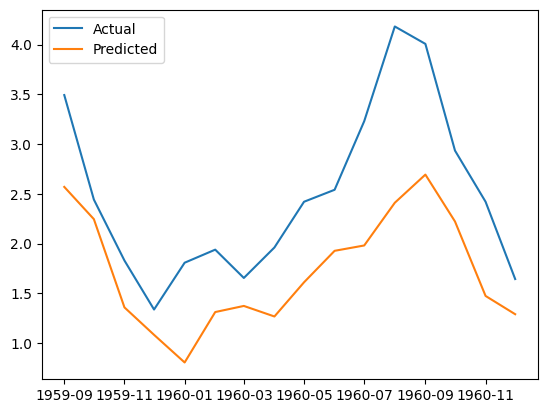

In [14]:
import seaborn as sns 
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, GRU # Note the change here
from tensorflow.keras.models import Sequential

# Load flight data
flights = sns.load_dataset('flights')

# Convert data to time series 
df = pd.DataFrame({'value': flights['passengers'].values}, index=pd.date_range(start='1949-01-01', end='1960-12-01', freq='MS'))
df.head()

# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Normalize the data
train_mean = train_data.mean()
train_std = train_data.std()
train_data = (train_data - train_mean) / train_std
test_data = (test_data - train_mean) / train_std

# Convert data to sequences
def to_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length-1):
        X_seq = data[i:(i+seq_length)].values
        X.append(X_seq)
        y_seq = data.iloc[i+seq_length].values[0]
        y.append(y_seq)
    return np.array(X), np.array(y)

seq_length = 12
X_train, y_train = to_sequences(train_data, seq_length)
X_test, y_test = to_sequences(test_data, seq_length)

# Reshape input to be (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the model using GRU
model = Sequential([
    GRU(32, input_shape=(seq_length, 1)), # Note the change here
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Make predictions on test data
y_pred = model.predict(X_test)

# Plot the predictions and actual values
import matplotlib.pyplot as plt
plt.plot(test_data.index[seq_length+1:], y_test, label='Actual')
plt.plot(test_data.index[seq_length+1:], y_pred, label='Predicted')
plt.legend()
plt.show()

# Completed